# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd
import re
import warnings
warnings.filterwarnings(action='ignore')
from collections import Counter

In [2]:
import nltk

In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [4]:
spam = pd.read_csv('/content/drive/MyDrive/동아리/spam.csv')

In [5]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [6]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
spam.isnull().sum()

v1    0
v2    0
dtype: int64

In [8]:
spam['v2'] = spam['v2'].str.lower() # 소문자로

In [9]:
spam['v2'] = [re.sub('[^A-Za-z]', ' ', s).lower() for s in spam['v2']]

In [10]:
spam.iloc[5]['v2'] # 확인

'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send         to rcv'

## Tokenizing


In [ ]:
'''
주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 합니다. 
토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다.
'''

'\n주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 합니다. \n토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의합니다.\n'

In [13]:
# # 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.tokenize import word_tokenize

print('word_tokenize :',word_tokenize(spam.iloc[5]['v2']))

word_tokenize : ['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


In [15]:
from nltk.tokenize import WordPunctTokenizer

print('WordPunctTokenizer :',WordPunctTokenizer().tokenize(spam.iloc[5]['v2']))

# WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있습니다.

WordPunctTokenizer : ['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


In [16]:
from nltk.tokenize import TreebankWordTokenizer

'''
규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.
'''
print('트리뱅크 워드토크나이저 :',TreebankWordTokenizer().tokenize(spam.iloc[5]['v2']))

트리뱅크 워드토크나이저 : ['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']


In [19]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
spam['stopword_v2'] = ''
for i in range(0,len(spam)):
    word_token = word_tokenize(spam.iloc[i]['v2'])
    new_v2_i = []
    for w in word_token:
        if w not in stop_words :
            new_v2_i.append(w)
    spam['stopword_v2'][i] = new_v2_i

In [21]:
spam

,v1,v2,stopword_v2
0,ham,go until jurong point crazy available only ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor u c already then say,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,nah i don t think he goes to usf he lives aro...,"[nah, think, goes, usf, lives, around, though]"
...,...,...,...
5567,spam,this is the nd time we have tried contact u...,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,ham,will b going to esplanade fr home,"[b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that so any other s...,"[pity, mood, suggestions]"
5570,ham,the guy did some bitching but i acted like i d...,"[guy, bitching, acted, like, interested, buyin..."



## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [29]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=spam[spam.v1 == 'ham']['stopword_v2'], size=100, window=5, min_count=5, workers=4, sg=0)

In [30]:
model_result = model.wv.most_similar("man")
print(model_result)

[('still', 0.9998964667320251), ('get', 0.9998952746391296), ('like', 0.9998888373374939), ('way', 0.9998801350593567), ('much', 0.9998773336410522), ('please', 0.9998770952224731), ('time', 0.9998766183853149), ('also', 0.9998764991760254), ('going', 0.9998754858970642), ('one', 0.999874472618103)]


In [31]:
model_result = model.wv.most_similar("free")
print(model_result)

[('going', 0.9999167919158936), ('one', 0.9999136924743652), ('u', 0.9999125003814697), ('hey', 0.9999067783355713), ('go', 0.99990314245224), ('got', 0.999900221824646), ('back', 0.9998995065689087), ('like', 0.9998981952667236), ('also', 0.9998968243598938), ('send', 0.9998959898948669)]


In [35]:
model = Word2Vec(sentences=spam[spam.v1 == 'spam']['stopword_v2'], size=100, window=5, min_count=5, workers=4, sg=0)

In [37]:
model_result = model.wv.most_similar("free")
print(model_result)

[('call', 0.9998544454574585), ('u', 0.9998384714126587), ('p', 0.9997981786727905), ('text', 0.9997822046279907), ('ur', 0.9997718930244446), ('txt', 0.9997692704200745), ('mobile', 0.9997692704200745), ('chat', 0.9997610449790955), ('nokia', 0.9997546076774597), ('send', 0.999731183052063)]


In [22]:
from gensim.models import FastText

In [32]:
model = FastText(spam[spam.v1 == 'ham']['stopword_v2'], window=5, min_count=5, sg=0)
model_result = model.wv.most_similar("free")
print(model_result)

[('sleeping', 0.9999766945838928), ('coming', 0.999976396560669), ('another', 0.9999759197235107), ('thought', 0.9999752044677734), ('started', 0.9999750852584839), ('however', 0.9999747276306152), ('yesterday', 0.9999746084213257), ('never', 0.9999746084213257), ('ever', 0.9999743700027466), ('happiness', 0.9999735951423645)]


In [34]:
model = FastText(spam[spam.v1 == 'ham']['stopword_v2'], window=5, min_count=5, sg=0)
model_result = model.wv.most_similar("man")
print(model_result)

[('mother', 0.9999824166297913), ('planning', 0.9999822378158569), ('reading', 0.9999816417694092), ('making', 0.9999815821647644), ('fighting', 0.9999814033508301), ('getting', 0.9999812841415405), ('meaning', 0.9999810457229614), ('waiting', 0.9999809265136719), ('coming', 0.9999808669090271), ('buying', 0.9999806880950928)]


In [33]:
model = FastText(spam[spam.v1 == 'spam']['stopword_v2'], window=5, min_count=5, sg=0)
model_result = model.wv.most_similar("free")
print(model_result)

[('freephone', 0.9999777674674988), ('tone', 0.999973475933075), ('freemsg', 0.9999734163284302), ('mobile', 0.9999723434448242), ('selection', 0.999971866607666), ('call', 0.9999707937240601), ('collection', 0.9999695420265198), ('ringtone', 0.9999694228172302), ('waiting', 0.9999686479568481), ('text', 0.9999680519104004)]


In [38]:
model = FastText(spam[spam.v1 == 'spam']['stopword_v2'], window=5, min_count=5, sg=0)
model_result = model.wv.most_similar("call")
print(model_result)

[('caller', 0.9999873042106628), ('calling', 0.9999862909317017), ('calls', 0.9999847412109375), ('contacted', 0.9999825358390808), ('freephone', 0.9999809861183167), ('landline', 0.9999805688858032), ('collect', 0.9999803304672241), ('selected', 0.9999802112579346), ('dating', 0.999980092048645), ('collection', 0.9999798536300659)]


In [39]:
model = FastText(spam[spam.v1 == 'spam']['stopword_v2'], window=5, min_count=5, sg=0)
model_result = model.wv.most_similar("money")
print(model_result)

[('yrs', 0.9988481998443604), ('fone', 0.9988398551940918), ('looking', 0.9988303780555725), ('croydon', 0.9988259077072144), ('either', 0.9988251328468323), ('nd', 0.9988167881965637), ('anytime', 0.9988102912902832), ('last', 0.998809814453125), ('day', 0.998805582523346), ('freephone', 0.99880051612854)]


## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [ ]:
spam.head(3)

,v1,v2,stopword_v2
0,ham,go until jurong point crazy available only ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."


In [ ]:
spam['v2'][1]

'ok lar    joking wif u oni   '

In [ ]:
spam['stopword_v2'][1]

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

In [ ]:
spamuniq=spam.groupby('v1')['v1'].agg(**{'counter':'count'}).sort_values('counter').reset_index()

In [ ]:
for code in spam['v1'].unique():
    index_tmp = spam[spam['v1']==code]['stopword_v2'].index
    start_index = 0
    arr = []
    for i in range(0,len(spam[spam['v1']==code]['stopword_v2'])):
        arr = arr +spam['stopword_v2'][index_tmp[start_index]]
        start_index += 1
    tmp = dict(Counter(arr))
    print(tmp)
    spamuniq['counter'][spamuniq[spamuniq['v1']==code].index[0]] = [tmp]

{'go': 253, 'jurong': 1, 'point': 13, 'crazy': 10, 'available': 15, 'bugis': 7, 'n': 144, 'great': 104, 'world': 37, 'la': 7, 'e': 84, 'buffet': 2, 'cine': 7, 'got': 245, 'amore': 1, 'wat': 106, 'ok': 287, 'lar': 38, 'joking': 6, 'wif': 27, 'u': 1026, 'oni': 4, 'dun': 55, 'say': 92, 'early': 33, 'hor': 2, 'c': 63, 'already': 90, 'nah': 10, 'think': 128, 'goes': 26, 'usf': 11, 'lives': 4, 'around': 59, 'though': 26, 'even': 56, 'brother': 19, 'like': 232, 'speak': 23, 'treat': 16, 'aids': 1, 'patent': 1, 'per': 13, 'request': 7, 'melle': 6, 'oru': 4, 'minnaminunginte': 3, 'nurungu': 3, 'vettam': 3, 'set': 19, 'callertune': 10, 'callers': 5, 'press': 10, 'copy': 9, 'friends': 50, 'gon': 59, 'na': 99, 'home': 165, 'soon': 58, 'want': 165, 'talk': 40, 'stuff': 45, 'anymore': 8, 'tonight': 57, 'k': 145, 'cried': 1, 'enough': 27, 'today': 139, 'searching': 5, 'right': 89, 'words': 23, 'thank': 28, 'breather': 1, 'promise': 9, 'wont': 32, 'take': 125, 'help': 36, 'granted': 1, 'fulfil': 1, 'w

In [ ]:
spamuniq

,v1,counter
0,spam,"[{'free': 228, 'entry': 28, 'wkly': 14, 'comp'..."
1,ham,"[{'go': 253, 'jurong': 1, 'point': 13, 'crazy'..."


In [ ]:
hamcounter=pd.DataFrame(list(spamuniq['counter'][1][0].items()),columns=['word','count']).sort_values('count')
hamcounter

,word,count
3267,je,1
4347,lool,1
4346,pos,1
4345,tie,1
4344,massage,1
...,...,...
16,ok,287
231,get,311
225,lt,316
226,gt,318


In [ ]:
spamcounter=pd.DataFrame(list(spamuniq['counter'][0][0].items()),columns=['word','count']).sort_values('count')
spamcounter

,word,count
992,nick,1
1345,page,1
1344,created,1
1343,gotto,1
1341,bitch,1
...,...,...
15,txt,170
65,p,180
50,u,186
0,free,228


In [ ]:
!pip install wordcloud

<function matplotlib.pyplot.show(close=None, block=None)>

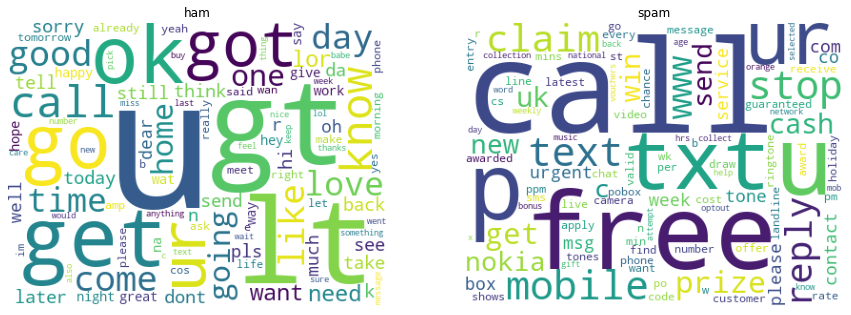

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300)

plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.title('ham')
count_dic = dict(zip(hamcounter['word'], hamcounter['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('spam')
count_dic = dict(zip(spamcounter['word'], spamcounter['count']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.show